In [1]:
!pip install matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples: {x_test.shape[0]}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training samples: 50000
Testing samples: 10000


In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 109s 151ms/step - accuracy: 0.2916 - loss: 1.9173 - val_accuracy: 0.5082 - val_loss: 1.3239
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 105s 149ms/step - accuracy: 0.5093 - loss: 1.3585 - val_accuracy: 0.6082 - val_loss: 1.0942
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 147s 156ms/step - accuracy: 0.5834 - loss: 1.1698 - val_accuracy: 0.6678 - val_loss: 0.9535
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 136s 149ms/step - accuracy: 0.6365 - loss: 1.0447 - val_accuracy: 0.6742 - val_loss: 0.9162
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 150s 160ms/step - accuracy: 0.6671 - loss: 0.9565 - val_accuracy: 0.7144 - val_loss: 0.8203
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 105s 148ms/step - accuracy: 0.6921 - loss: 0.8751 - val_accuracy: 0.7220 - val_loss: 0.8002
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 141s 148ms/step - accuracy: 0.7168 - loss: 0.8058 - val_accuracy: 0.7144 - val_loss: 0.8219
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 147s 155ms/step - accuracy: 0.7316 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7377 - loss: 0.7761
Test Accuracy: 0.73


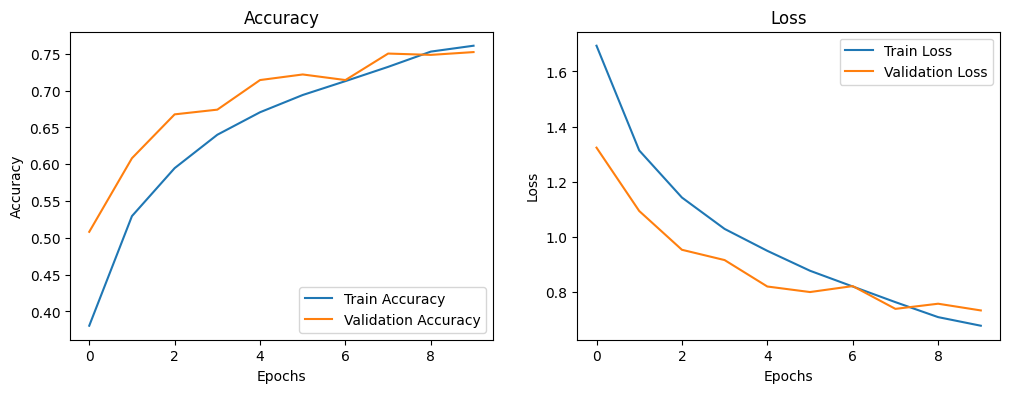

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


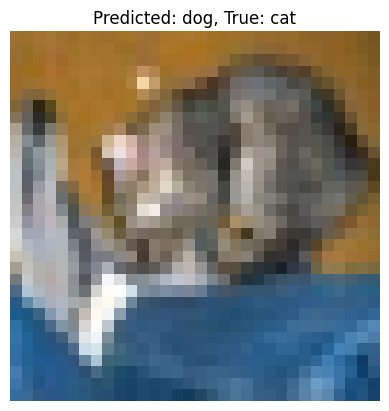

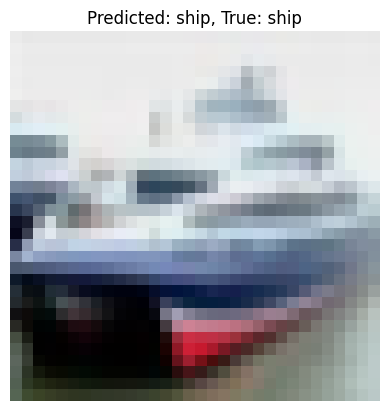

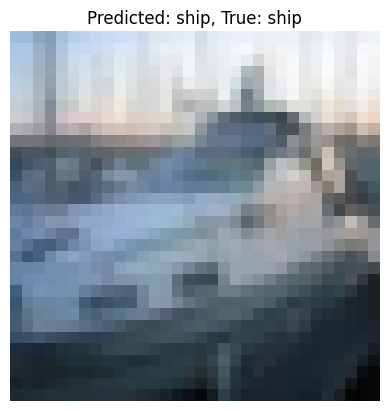

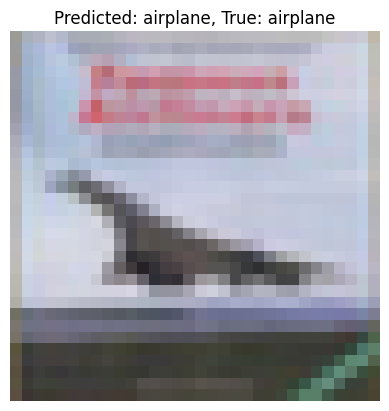

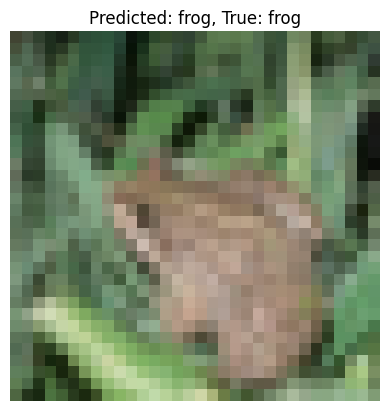

In [9]:
def plot_predictions(model, x_test, y_test, num_images=5):
    class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predictions = model.predict(x_test[:num_images])

    for i in range(num_images):
        plt.imshow(x_test[i])
        predicted_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[np.argmax(y_test[i])]
        plt.title(f"Predicted: {predicted_label}, True: {true_label}")
        plt.axis('off')
        plt.show()

plot_predictions(model, x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


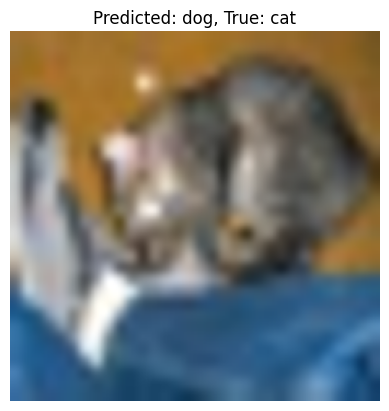

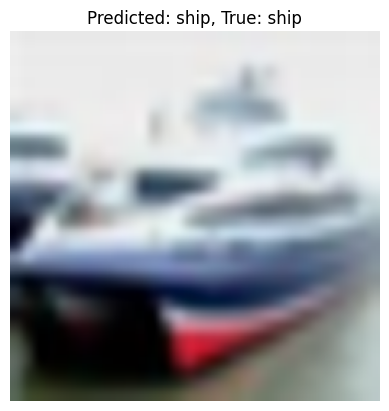

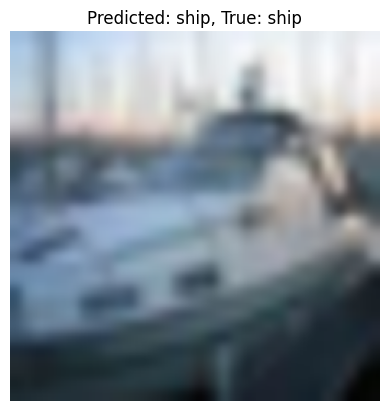

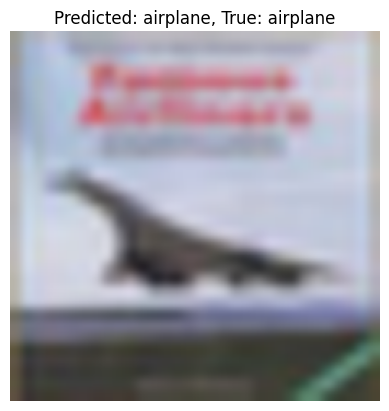

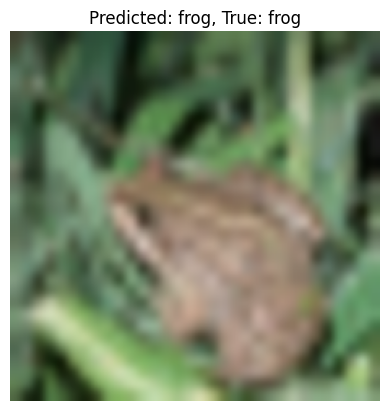

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

def plot_predictions(model, x_test, y_test, num_images=5):
    class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predictions = model.predict(x_test[:num_images])

    for i in range(num_images):
        # Resize the image for better visualization
        img = Image.fromarray((x_test[i] * 255).astype('uint8'), 'RGB').resize((256, 256))
        plt.imshow(img)
        predicted_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[np.argmax(y_test[i])]
        plt.title(f"Predicted: {predicted_label}, True: {true_label}")
        plt.axis('off')
        plt.show()

plot_predictions(model, x_test, y_test)